# 100. Boston House Price Regression (보스턴 주택 가격 예측)

## 데이터 설명

### 독립변수 (13개)

- CRIM 자치시(town) 별 1인당 범죄율
- 
ZN 25,000 평방피트를 초과하는 거주지역의 비
- 
INDUS 비소매상업지역이 점유하고 있는 토지의 
- 율
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면
- 0)
NOX 10ppm 당 농축 일
- 화질소
RM 주택 1가구당 평균 
- 의 개수
AGE 1940년 이전에 건축된 소유
- 택의 비율
DIS 5개의 보스턴 직업센터까지의
- 접근성 지수
RAD 방사형 도로까지
-  접근성 지수
TAX 10,000 
- 러 당 재산세율
PTRATIO 자치시(town)
-  학생/교사 비율
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별
- 흑인의 비율을 말함
LSTAT 모집단의 하위계층의 비율(%)

### 종속변수 (1개)

- MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

## 필요 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 로드

In [14]:
X, y = datasets.fetch_openml('boston', return_X_y=True)

In [15]:
print([x.shape for x in [X, y]])

[(506, 13), (506,)]


## 데이터 분할 및 전처리

In [19]:
X.isna().sum().sum()

0

In [21]:
X = MinMaxScaler().fit_transform(X)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [23]:
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(354, 13), (152, 13), (354,), (152,)]


## 모델 구성 및 빌드

In [57]:
del model

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(13,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error,
             metrics=['mse', 'mae'])

## 모델 학습

In [60]:
history = model.fit(x_train, y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
12/12 [==============================] - 1s 15ms/step - loss: 583.2482 - mse: 583.2482 - mae: 22.1765 - val_loss: 536.8536 - val_mse: 536.8536 - val_mae: 21.5492
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 550.0071 - mse: 550.0071 - mae: 21.3622 - val_loss: 501.3683 - val_mse: 501.3683 - val_mae: 20.6744
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 509.8099 - mse: 509.8099 - mae: 20.3447 - val_loss: 455.0833 - val_mse: 455.0833 - val_mae: 19.4628
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 454.8167 - mse: 454.8167 - mae: 18.8623 - val_loss: 391.8777 - val_mse: 391.8777 - val_mae: 17.6578
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 382.4193 - mse: 382.4193 - mae: 16.6941 - val_loss: 309.2743 - val_mse: 309.2743 - val_mae: 15.1187
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 296.9196 - mse: 296.9196 - mae: 14.0562 - val_loss: 223.6940 

In [61]:
model.evaluate(x_test, y_test, verbose=2)

5/5 - 0s - loss: 10.1257 - mse: 10.1257 - mae: 2.4888 - 34ms/epoch - 7ms/step


[10.125738143920898, 10.125738143920898, 2.4887561798095703]

## 모델 평가

In [62]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [63]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 10.125736847558214
R2 Score: 0.8568246447426957


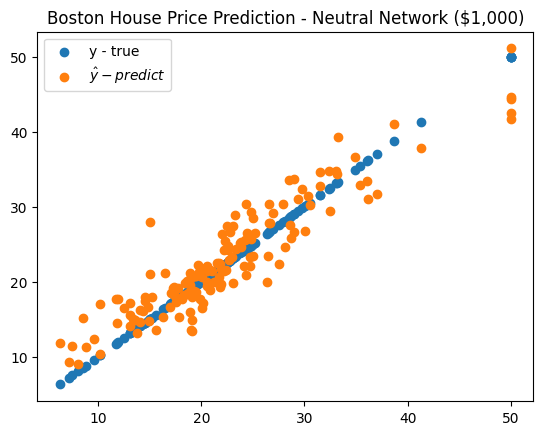

In [64]:
plt.scatter(y_test, y_test, label='y - true')
plt.scatter(y_test, y_pred, label='$\hat{y} - predict$')
plt.legend()
plt.title('Boston House Price Prediction - Neutral Network ($1,000)')
plt.show()

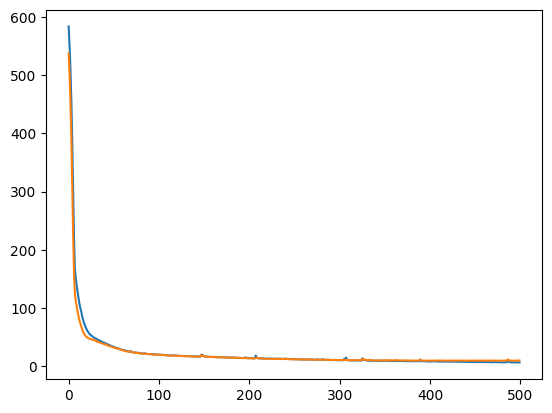

In [65]:
plt.plot(history.history['mse'], label='Training Error')
plt.plot(history.history['val_mse'], label='Validation Error')
plt.show()

# 실습 1. Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression Model

## 데이터 설명

- auto-mpg.data - data file  
- auto-mpg.names - data 설명 file
- Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

### 독립변수

- cylinders:     multi-valued discrete
- displacement:  continuous (배기량)
- horsepower:    continuous
- weight:        continuous
- acceleration:  continuous
- model year:    multi-valued discrete
- origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan
- car name:      string (unique for each instance)  

### 종속변수

- mpg:           continuous  

## 필요 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 데이터 로드

In [5]:
temp_file = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
df = pd.read_csv(temp_file, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## EDA 및 데이터 전처리

In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
Y = df.pop('mpg')
X = df.copy()

In [10]:
print([x.shape for x in [X, Y]])

[(392, 7), (392,)]


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [12]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 392 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [13]:
for c in ['cylinders', 'origin']:
    print(X[c].value_counts().sort_index())

cylinders
3      4
4    199
5      3
6     83
8    103
Name: count, dtype: int64
origin
1    245
2     68
3     79
Name: count, dtype: int64


In [14]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
X = pd.concat([X, pd.get_dummies(X['cylinders'], prefix='cyl')], axis=1)

In [16]:
X['USA'] = (X['origin'] == 1)
X['Europe'] = (X['origin'] == 2)
X['Japan'] = (X['origin'] == 3)

In [17]:
X.drop(columns=['cylinders', 'origin'], inplace=True)
X.head()

,displacement,horsepower,weight,acceleration,model year,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,USA,Europe,Japan
0,307.0,130.0,3504.0,12.0,70,False,False,False,False,True,True,False,False
1,350.0,165.0,3693.0,11.5,70,False,False,False,False,True,True,False,False
2,318.0,150.0,3436.0,11.0,70,False,False,False,False,True,True,False,False
3,304.0,150.0,3433.0,12.0,70,False,False,False,False,True,True,False,False
4,302.0,140.0,3449.0,10.5,70,False,False,False,False,True,True,False,False


In [25]:
X = StandardScaler().fit_transform(X)

## 데이터 분할

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [27]:
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(274, 13), (118, 13), (274,), (118,)]


## 모델 생성

In [20]:
model = tf.keras.models.Sequential()

In [21]:
model.add(tf.keras.layers.Dense(input_shape=(13,), units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error, metrics=['mse', 'mae'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 훈련

In [28]:
history = model.fit(xtrain, ytrain, batch_size=32, epochs=500, validation_data=(xtest, ytest), verbose=2)

Epoch 1/500
9/9 - 1s - loss: 585.9282 - mse: 585.9282 - mae: 22.9104 - val_loss: 625.3258 - val_mse: 625.3258 - val_mae: 23.5829 - 714ms/epoch - 79ms/step
Epoch 2/500
9/9 - 0s - loss: 557.3390 - mse: 557.3390 - mae: 22.2942 - val_loss: 597.6296 - val_mse: 597.6296 - val_mae: 22.9739 - 72ms/epoch - 8ms/step
Epoch 3/500
9/9 - 0s - loss: 529.7084 - mse: 529.7084 - mae: 21.6597 - val_loss: 567.4916 - val_mse: 567.4916 - val_mae: 22.2949 - 59ms/epoch - 7ms/step
Epoch 4/500
9/9 - 0s - loss: 499.0274 - mse: 499.0274 - mae: 20.9330 - val_loss: 533.2947 - val_mse: 533.2947 - val_mae: 21.4905 - 48ms/epoch - 5ms/step
Epoch 5/500
9/9 - 0s - loss: 463.6492 - mse: 463.6492 - mae: 20.0678 - val_loss: 493.1755 - val_mse: 493.1755 - val_mae: 20.5055 - 54ms/epoch - 6ms/step
Epoch 6/500
9/9 - 0s - loss: 423.1649 - mse: 423.1649 - mae: 19.0013 - val_loss: 444.0343 - val_mse: 444.0343 - val_mae: 19.2642 - 52ms/epoch - 6ms/step
Epoch 7/500
9/9 - 0s - loss: 372.5307 - mse: 372.5307 - mae: 17.6548 - val_loss:

In [29]:
model.evaluate(xtest, ytest)

4/4 [==============================] - 0s 3ms/step - loss: 10.5719 - mse: 10.5719 - mae: 2.1159


[10.571860313415527, 10.571860313415527, 2.115898370742798]

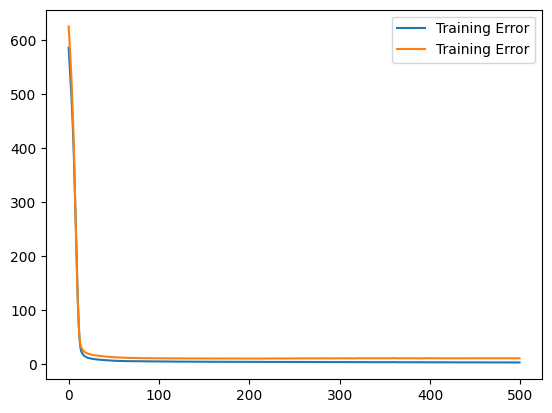

In [30]:
sns.lineplot(history.history['mse'], label='Training Error')
sns.lineplot(history.history['val_mse'], label='Training Error')
plt.show()

## 모델 평가

In [31]:
ypred = model.predict(xtest)

4/4 [==============================] - 0s 4ms/step


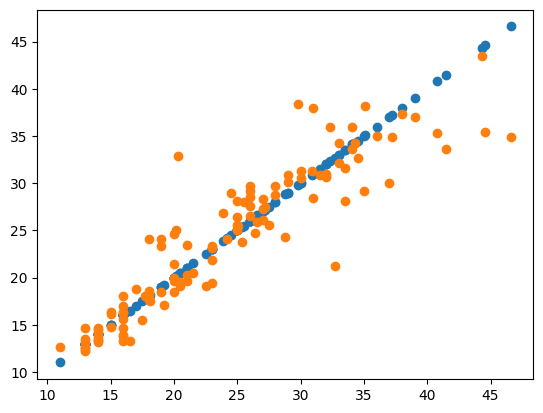

In [32]:
plt.scatter(ytest, ytest, label='y')
plt.scatter(ytest, ypred, label='$\hat{y}$')
plt.show()

In [33]:
print(f'MSE= {mean_squared_error(ytest, ypred):,.4f}')
print(f'MAE= {mean_absolute_error(ytest, ypred):,.4f}')
print(f'R2 Score= {r2_score(ytest, ypred):,.4f}')

MSE= 10.5719
MAE= 2.1159
R2 Score= 0.8420


# 실습 2. Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression Model

## 필요 라이브러리 로드

In [34]:
import numpy as np
import pandas as pd

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [105]:
temp_file = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
df = pd.read_csv(temp_file, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

In [106]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## EDA 및 데이터 전처리

In [107]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.corr()['mpg']

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

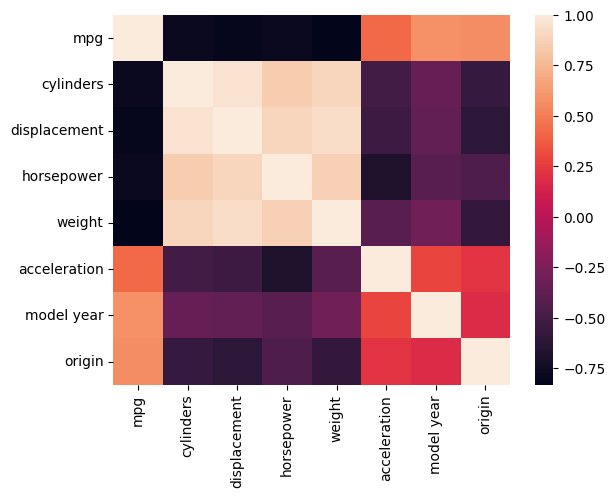

In [110]:
sns.heatmap(df.corr())
plt.show()

In [111]:
Y = df.pop('mpg')
X = df.copy()

In [112]:
X = pd.concat([X, pd.get_dummies(X['cylinders'], prefix='cyl')], axis=1)

In [113]:
X['USA'] = (X['origin'] == 1)
X['Europe'] = (X['origin'] == 2)
X['Japan'] = (X['origin'] == 3)

In [114]:
X.drop(columns=['cylinders', 'origin'], inplace=True)

In [115]:
X.head()

,displacement,horsepower,weight,acceleration,model year,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,USA,Europe,Japan
0,307.0,130.0,3504.0,12.0,70,False,False,False,False,True,True,False,False
1,350.0,165.0,3693.0,11.5,70,False,False,False,False,True,True,False,False
2,318.0,150.0,3436.0,11.0,70,False,False,False,False,True,True,False,False
3,304.0,150.0,3433.0,12.0,70,False,False,False,False,True,True,False,False
4,302.0,140.0,3449.0,10.5,70,False,False,False,False,True,True,False,False


## 데이터 분할

In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [117]:
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

[(274, 13), (118, 13), (274,), (118,)]


# 모델 생성 및 훈련

In [118]:
def get_model_score(model, xtrain, xtest, ytrain, ytest):
    S1 = model.score(xtrain, ytrain)
    S2 = model.score(xtest, ytest)

    ypred = model.predict(xtest)
    S3 = mean_squared_error(ytest, ypred)
    S4 = mean_absolute_error(ytest, ypred)
    S5 = r2_score(ytest, ypred)

    return pd.Series([S1, S2, S3, S4, S4], index='Train_Accuracy Validation_Accurary MSE MAE R2'.split())

In [119]:
def compare_models(xtrain, xtest, ytrain, ytest):
    result = pd.DataFrame()
    
    model = LinearRegression().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = KNeighborsRegressor().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = DecisionTreeRegressor().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = RandomForestRegressor().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    model = XGBRegressor().fit(xtrain, ytrain)
    result[model.__class__.__name__] = get_model_score(model, xtrain, xtest, ytrain, ytest)

    return result.T

In [120]:
result = compare_models(xtrain, xtest, ytrain, ytest)

In [121]:
result

,Train_Accuracy,Validation_Accurary,MSE,MAE,R2
LinearRegression,0.860305,0.796969,13.584740,2.683007,2.683007
KNeighborsRegressor,0.835847,0.662670,22.570617,3.432881,3.432881
DecisionTreeRegressor,1.000000,0.779541,14.750847,2.677966,2.677966
RandomForestRegressor,0.981342,0.858459,9.470476,2.120720,2.120720
XGBRegressor,0.999989,0.840227,10.690339,2.223894,2.223894


In [122]:
model = RandomForestRegressor().fit(xtrain, ytrain)

## 모델 평가

In [123]:
ypred = model.predict(xtest)

In [124]:
print(f'MSE= {mean_squared_error(ytest, ypred):,.4f}')
print(f'MAE= {mean_absolute_error(ytest, ypred):,.4f}')
print(f'R2 Score= {r2_score(ytest, ypred):,.4f}')

MSE= 9.6886
MAE= 2.1089
R2 Score= 0.8552


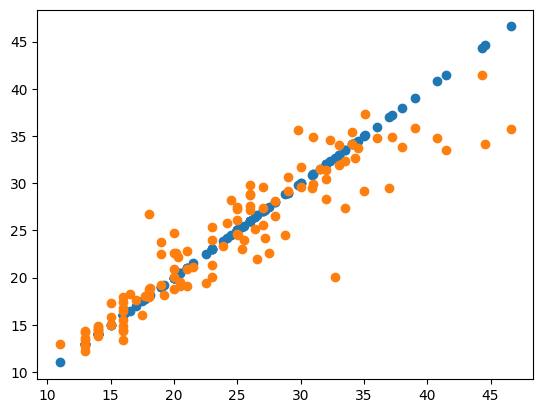

In [125]:
plt.scatter(ytest, ytest, label='y')
plt.scatter(ytest, ypred, label='$\hat{y}$')
plt.show()